In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
import yt
import pprint

import mpl_scatter_density

# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

%matplotlib inline 
plt.style.use("dark_background")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 22

# File Processing of TNG Files

In [2]:
snapshot_directory = '../../../../global/cscratch1/sd/jialiu/NEXUS_TNG/300-3-Dark/snap-99/'

In [3]:
files = []
data = []
coords = []
for i in range(4):
    file_i = h5py.File(snapshot_directory + 'snap_099.' + str(i) + '.hdf5', 'r')
    data_i = file_i['PartType1']
    coords_i = data_i['Coordinates']
    files.append(file_i)
    data.append(data_i)
    coords.append(coords_i)

x = np.hstack( [c[:,0] for c in coords] ) #what is hstack?
y = np.hstack( [c[:,1] for c in coords] )
z = np.hstack( [c[:,2] for c in coords] )   

# Visualize Data

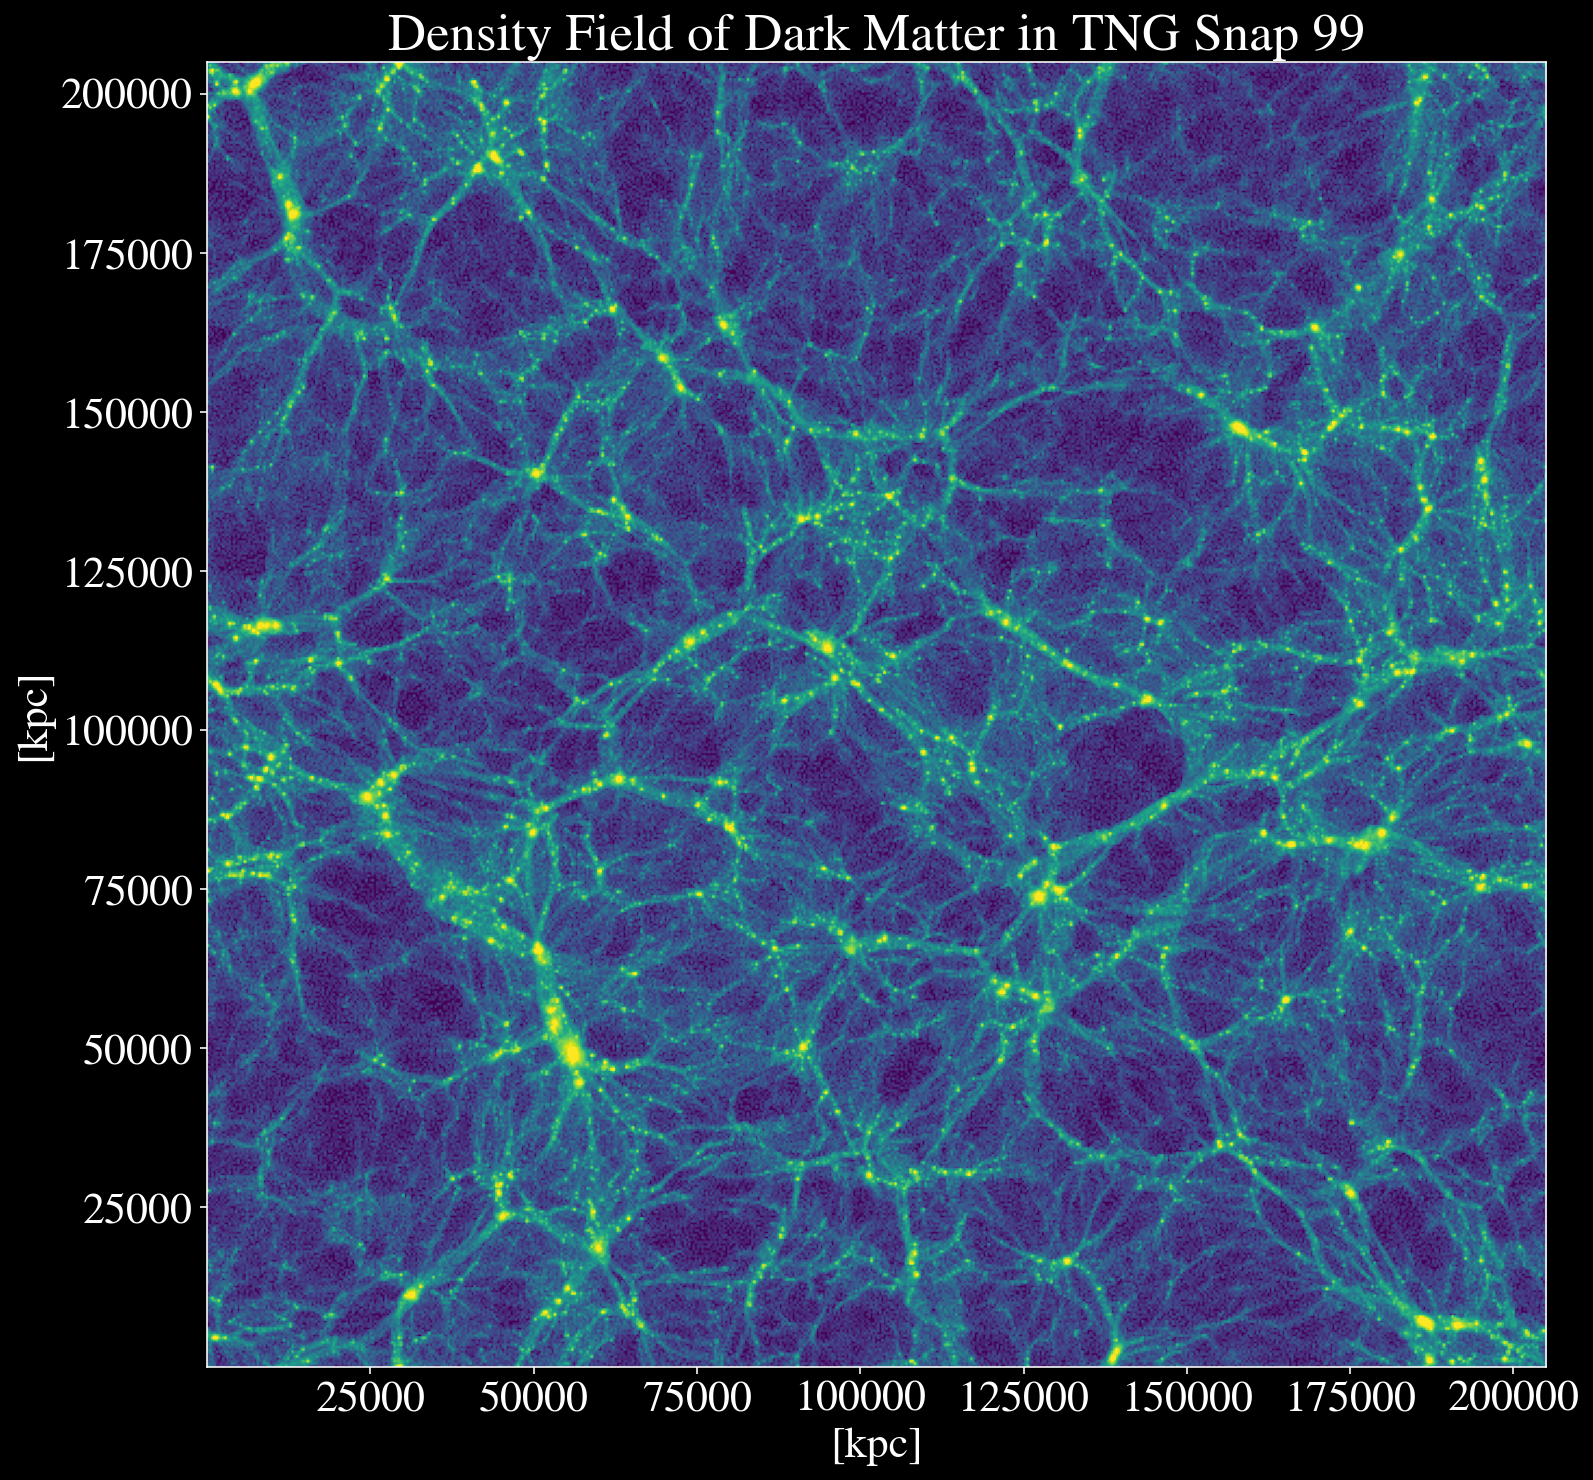

In [13]:
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())
xmin,xmax = np.min(x),np.max(x)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
f ilt = z < 5000
ax.set_title("Density Field of Dark Matter in TNG Snap 99")
ax.set_xlabel("[kpc]")
ax.set_ylabel("[kpc]")
ax.scatter_density(x[filt],y[filt], norm=norm)
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
#plt.savefig('TNG-SNAP99.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
data_array = np.array([x,y,z])

# DTFE Density Estimation

Need Zack's help to understand how to do this...

# Load Density Cubes

Luckily we have a work around, Jia actually downloaded zack's density cubes post DTFE Density Estimation!

In [17]:
density_cube_directory = '../../../../global/cscratch1/sd/jialiu/NEXUS_TNG/300-3-Dark/den/'
density_cube_snaps = ['0.npy', '5.npy', '10.npy', '15.npy','20.npy', 
                      '25.npy', '30.npy', '35.npy', '40.npy', '45.npy',
                      '50.npy', '55.npy', '60.npy','65.npy','70.npy', 
                      '75.npy', '80.npy', '85.npy', '90.npy', 
                      '95.npy','99.npy']